# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Classification" data-toc-modified-id="Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classification</a></div><div class="lev2 toc-item"><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Logistic Regression</a></div><div class="lev2 toc-item"><a href="#Probability-and-Odds" data-toc-modified-id="Probability-and-Odds-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Probability and Odds</a></div><div class="lev2 toc-item"><a href="#Odds-and-Odds-Ratios" data-toc-modified-id="Odds-and-Odds-Ratios-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Odds and Odds Ratios</a></div><div class="lev2 toc-item"><a href="#Regression-Coefficiencts---MLE" data-toc-modified-id="Regression-Coefficiencts---MLE-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Regression Coefficiencts - MLE</a></div><div class="lev2 toc-item"><a href="#Working-Logistic-Regression-with-R" data-toc-modified-id="Working-Logistic-Regression-with-R-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Working Logistic Regression with R</a></div><div class="lev2 toc-item"><a href="#Importing-the-dataset" data-toc-modified-id="Importing-the-dataset-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Importing the dataset</a></div><div class="lev2 toc-item"><a href="#Splitting-the-dataset-into-the-Training-set-and-Test-set" data-toc-modified-id="Splitting-the-dataset-into-the-Training-set-and-Test-set-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Splitting the dataset into the Training set and Test set</a></div><div class="lev2 toc-item"><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Feature Scaling</a></div><div class="lev2 toc-item"><a href="#Fitting-Logistic-Regression-to-the-Training-set" data-toc-modified-id="Fitting-Logistic-Regression-to-the-Training-set-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Fitting Logistic Regression to the Training set</a></div><div class="lev2 toc-item"><a href="#Predicting-the-Test-set-results" data-toc-modified-id="Predicting-the-Test-set-results-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Predicting the Test set results</a></div><div class="lev2 toc-item"><a href="#Making-the-Confusion-Matrix" data-toc-modified-id="Making-the-Confusion-Matrix-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Making the Confusion Matrix</a></div><div class="lev2 toc-item"><a href="#Visualising-the-Training-set-results" data-toc-modified-id="Visualising-the-Training-set-results-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Visualising the Training set results</a></div><div class="lev2 toc-item"><a href="#Visualising-the-Test-set-results" data-toc-modified-id="Visualising-the-Test-set-results-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>Visualising the Test set results</a></div>

# Classification

** Unlike regression where you predict a continuous number, you use classification to predict a category.**

**Classification models include linear models like Logistic Regression, SVM, and nonlinear ones like K-NN, Kernel SVM and Random Forests.**

## Logistic Regression

![Imgur](https://i.imgur.com/BbRGVew.png)

![Imgur](https://i.imgur.com/Etzy1gv.png?1)

![Imgur](https://i.imgur.com/SumFYQo.png?1)

## Probability and Odds

![Imgur](https://i.imgur.com/QvqaSOG.jpg?1)

## Odds and Odds Ratios

https://www.stat.ubc.ca/~rollin/teach/643w04/lec/node50.html

![Imgur](https://i.imgur.com/z2ig6My.png?1)

![Imgur](https://i.imgur.com/LIPvqsK.png?1)

http://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH/BasicQuantitativeConcepts/BasicQuantitativeConcepts6.html

![Imgur](https://i.imgur.com/dJTFTFj.png)

## Regression Coefficiencts - MLE

https://neos-guide.org/content/logit

![Imgur](https://i.imgur.com/bCOPs0p.png?1)

## Working Logistic Regression with R

In [1]:
# Importing the dataset
dataset = read.csv('data/Social_Network_Ads.csv')

In [2]:
head(dataset)

User.ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
15728773,Male,27,58000,0


## Importing the dataset

In [3]:
dataset = read.csv('data/Social_Network_Ads.csv')
dataset = dataset[3:5]

# Encoding the target feature as factor
# dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

## Splitting the dataset into the Training set and Test set

In [4]:
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

Warning message:
"package 'caTools' was built under R version 3.4.3"

## Feature Scaling

In [6]:
training_set[,1:2] = scale(training_set[, 1:2])
test_set[, 1:2] = scale(test_set[, 1:2])

## Fitting Logistic Regression to the Training set

In [7]:
classifier = glm(formula = Purchased ~ .,
                 family = binomial,
                 data = training_set)

## Predicting the Test set results

In [8]:
prob_pred = predict(classifier, type = 'response', newdata = test_set[-3])
y_pred = ifelse(prob_pred > 0.5, 1, 0)

## Making the Confusion Matrix

In [9]:
cm = table(test_set[, 3], y_pred > 0.5)

## Visualising the Training set results

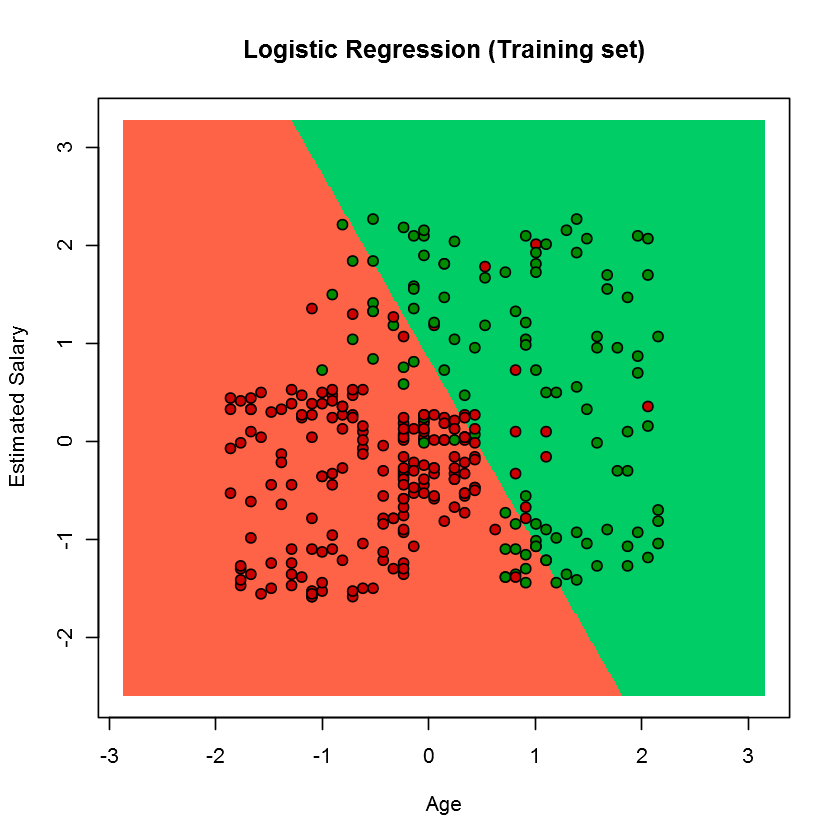

In [10]:
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

## Visualising the Test set results

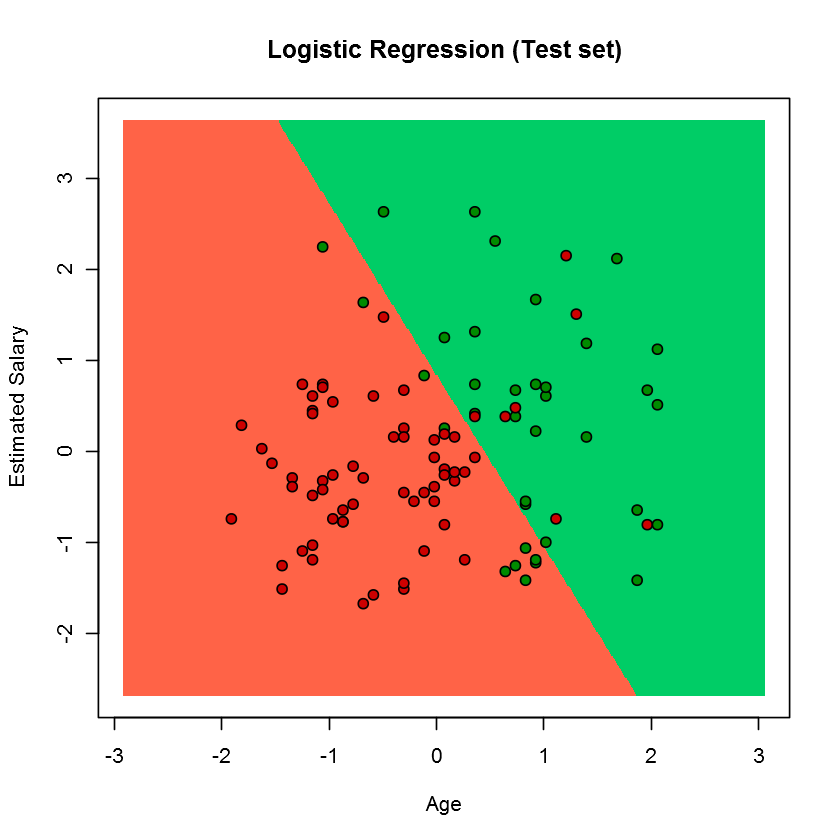

In [11]:
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))